# Measurements

Let's say we have a Hamiltonian H that can be represented by the following matrix

\begin{equation}
    H = \begin{pmatrix} 0.5 & 0 & 0 & 0 \\
                        0 & 1.5 & 0 & 0 \\
                        0 & 0 & 2.5 & 0 \\
                        0 & 0 & 0 & 3.5 
        \end{pmatrix}
\end{equation}



In [7]:
hmat = [ [0.5, 0., 0., 0.], [0., 1.5, 0., 0.], [0., 0., 2.5, 0.], [0., 0., 0., 3.5] ]

import sys
sys.path.append('..')
from src.MatrixToQISKITCircuit import *
from src.BinaryEncodings import *

mtoqc = MatrixToQISKITCircuit(hmat)
mtoqc.convert(standard_encode)

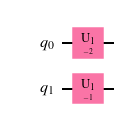

In [6]:
mtoqc.circuit.draw(output="mpl")